In [2]:
#Load modular polynomials
from sage.modular.ssmod.ssmod import Phi_polys

#This function builds a directed l-isogeny graph over Fp-bar
# INPUT: primes p, l, (optional) number of steps.
# OUTPUT: The l-isogeny graph over Fp-bar.
def build_isogeny_graph_over_Fpbar(p, l, steps=oo):
    q = next(q for q in Primes() if q%4 == 3 and kronecker_symbol(-q,p) == -1)
    K = QuadraticField(-q)
    H = K.hilbert_class_polynomial()
    j0 = H.change_ring(GF(p^2)).any_root()
    
    def get_neighbors(j):
        R.<x> = GF(p^2)[]
        phi = Phi_polys(l,x,j)
        return flatten([[j2]*k for j2,k in phi.roots()])
    G = DiGraph(multiedges=True,loops=True)
    visited = set()
    not_visited = set([j0])
    count = 0
    while not_visited:
        j1 = not_visited.pop()
        visited.add(j1)
        for j2 in get_neighbors(j1):
            G.add_edge([j1,j2])
            if j2 not in visited and j2 not in not_visited:
                not_visited.add(j2)
        count += 1
        if count == steps:
            break
    Gl = G.plot(vertex_size = 90)
    return G

# This function computes the spine of a directed l-isogeny graph.
# INPUT: primes p, l, (optional) number of steps.
# OUTPUT: The spine and the Fp-bar isogeny graph.
def directedSpineGraph(p, l, steps = oo):
    D = build_isogeny_graph_over_Fpbar(p, l,steps)
    G = D.copy()
    for j in G.vertices():
        if j not in GF(p):
            G.delete_vertex(j)
    return G, D

# Diameter Distribution
def compDiameterDistribution(spine):
    components = spine.connected_components_subgraphs()
    diameterList = []
    for G in components:
        diam = G.diameter()
        if type(diam) == sage.rings.infinity.PlusInfinity:
            diam = 0
        diameterList.append(diam)
    meanOfList = mean(diameterList)
    medianOfList = median(diameterList)
    modeOfList = mode(diameterList)[0]
    return diameterList, meanOfList, medianOfList, modeOfList

def fullDiameterNumber(spine):
    if spine.is_connected():
        diam = spine.diameter()
    else:
        components = spine.connected_components_subgraphs()
        diameterList = []
        for G in components:
            diameterList.append(G.diameter())
        diam = mean(diameterList)
    return diam

Till which sequence number of the primes would you like p to go to?  10


Distribution of the Mean of diameters of the components:


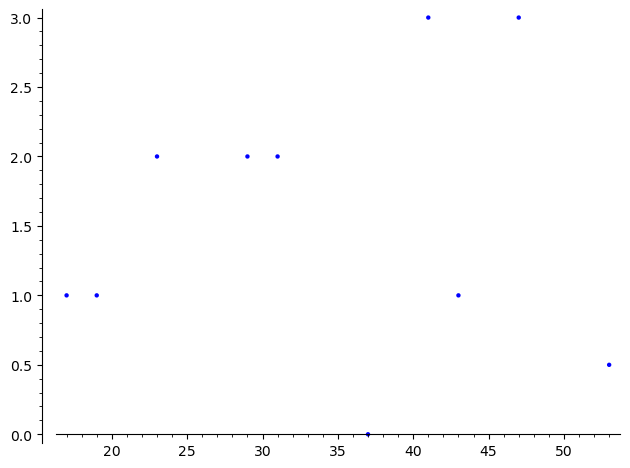

Distribution of the Median of diameters of the components:


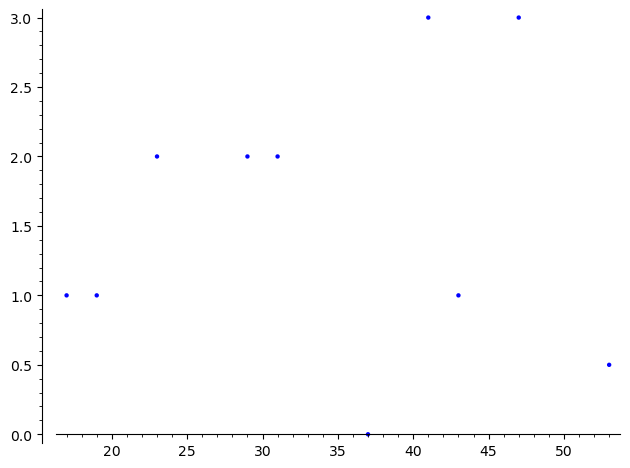

Distribution of the Mode of diameters of the components:


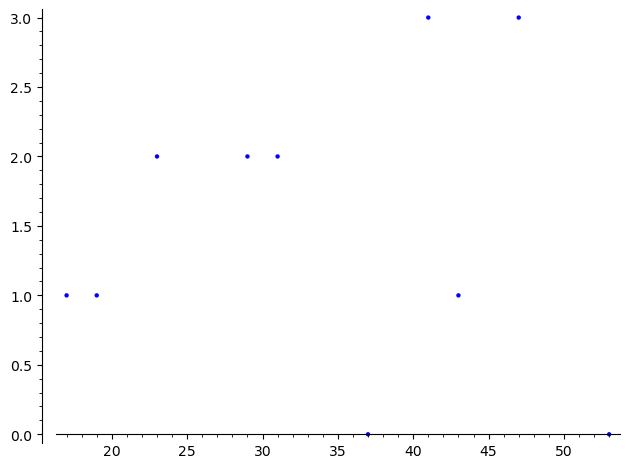

Distribution of the diameter of the Spine:


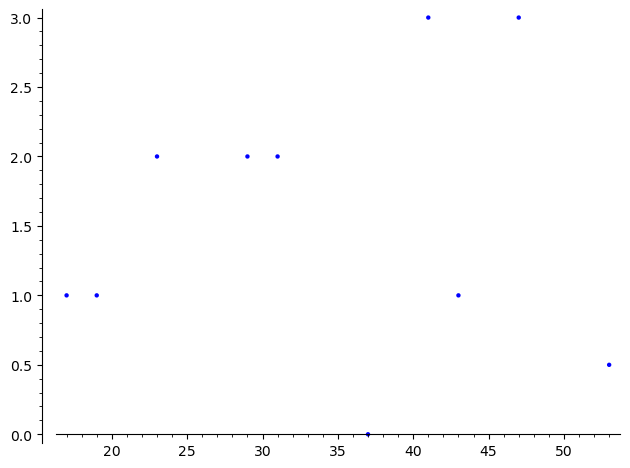

Distribution of the Mean of diameters of the components for p congruent to 1 mod 4:


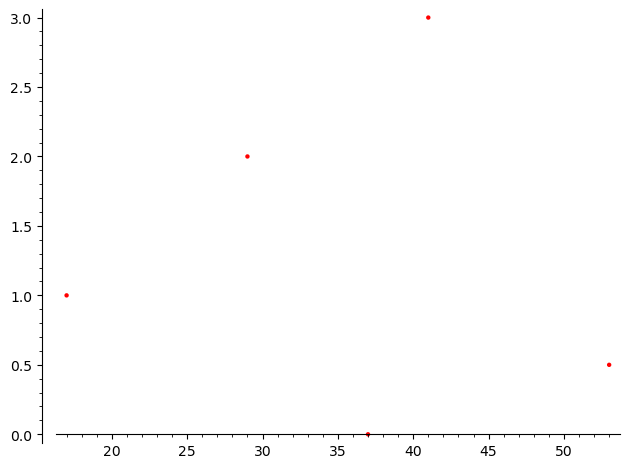

Distribution of the Median of diameters of the components for p congruent to 1 mod 4:


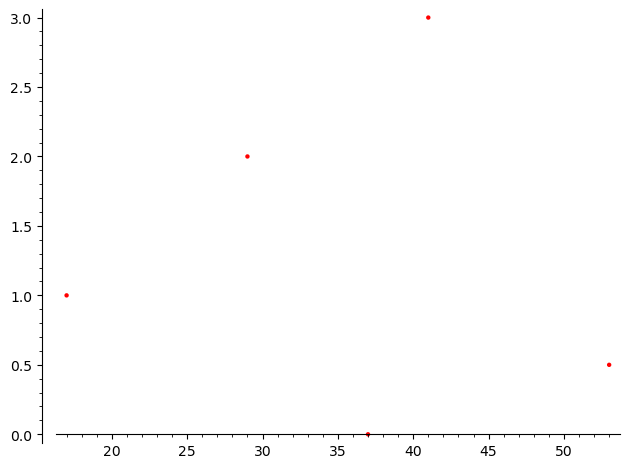

Distribution of the Mode of diameters of the components for p congruent to 1 mod 4:


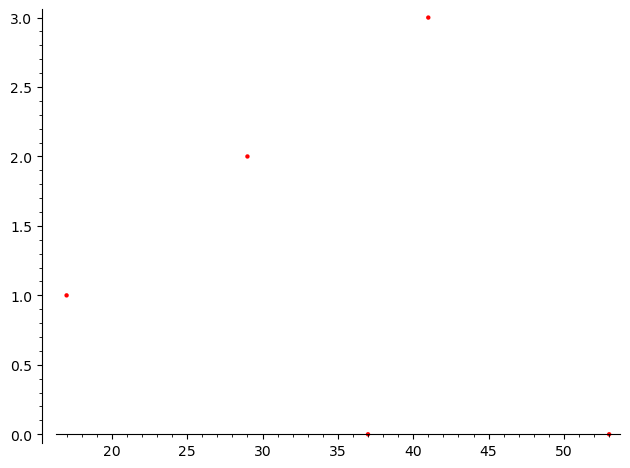

Distribution of the diameter of the Spine for p congruent to 1 mod 4:


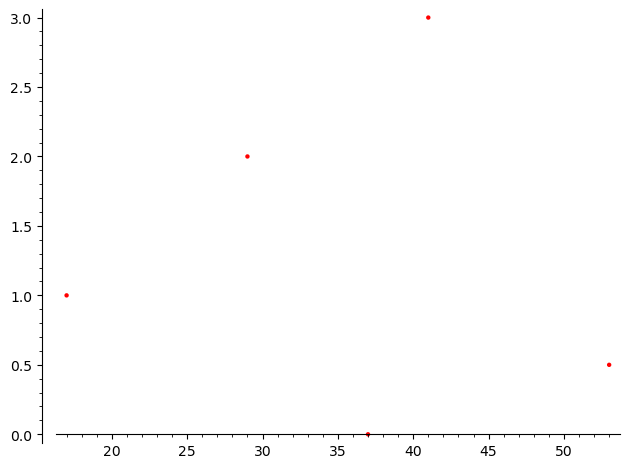

Distribution of the Mean of diameters of the components for p congruent to 7 mod 8:


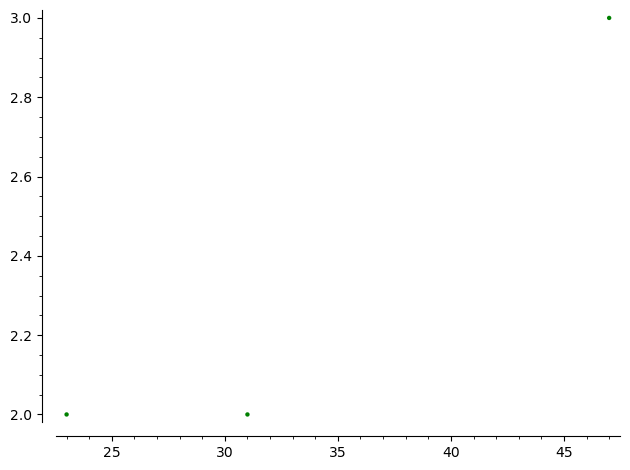

Distribution of the Median of diameters of the components for p congruent to 7 mod 8:


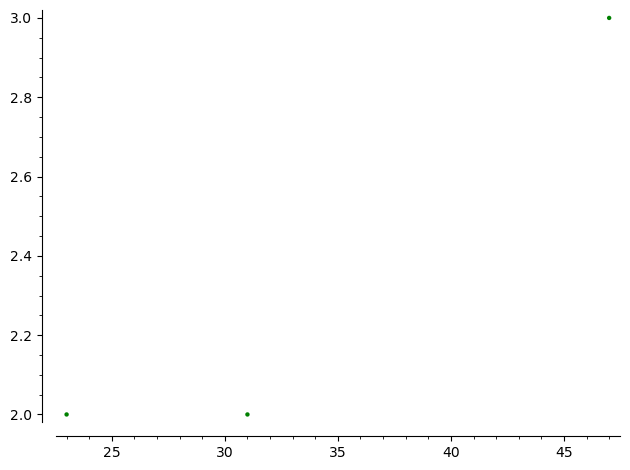

Distribution of the Mode of diameters of the components for p congruent to 7 mod 8:


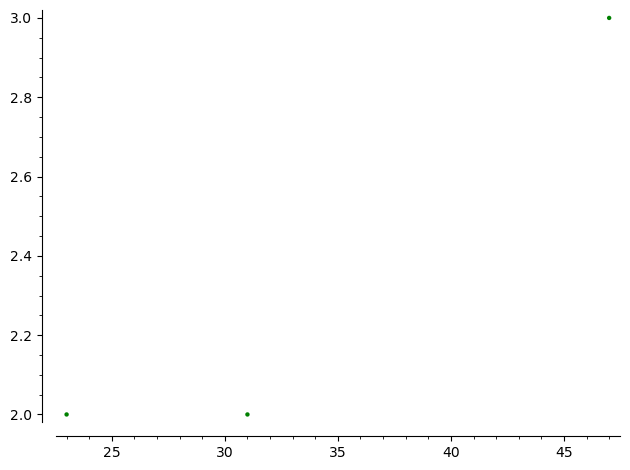

Distribution of the diameter of the Spine for p congruent to 7 mod 8:


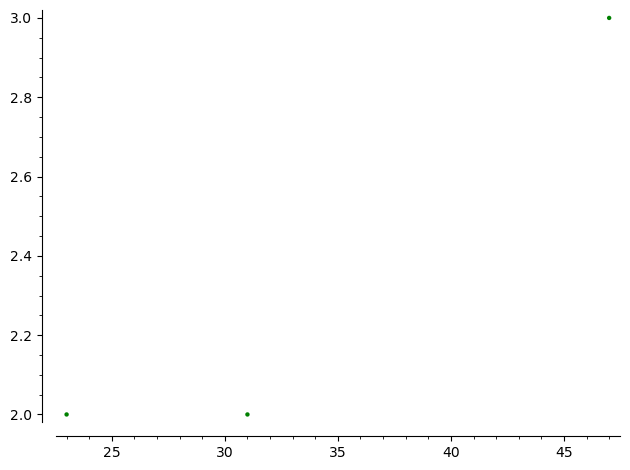

Distribution of the Mean of diameters of the components for p congruent to 3 mod 8:


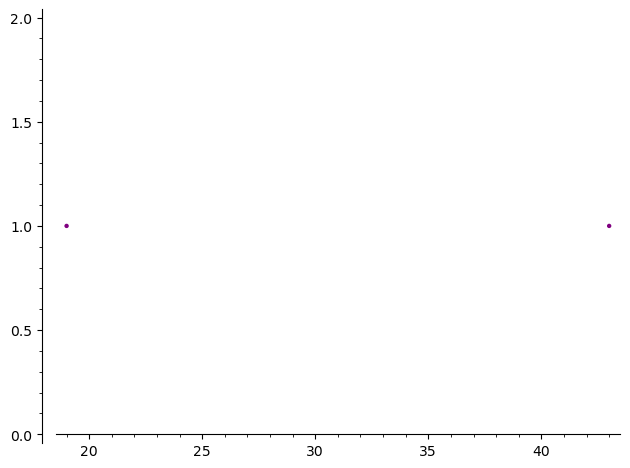

Distribution of the Median of diameters of the components for p congruent to 3 mod 8:


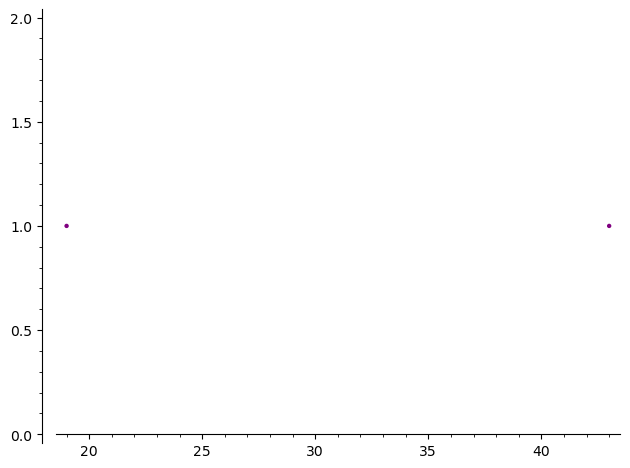

Distribution of the Mode of diameters of the components for p congruent to 3 mod 8:


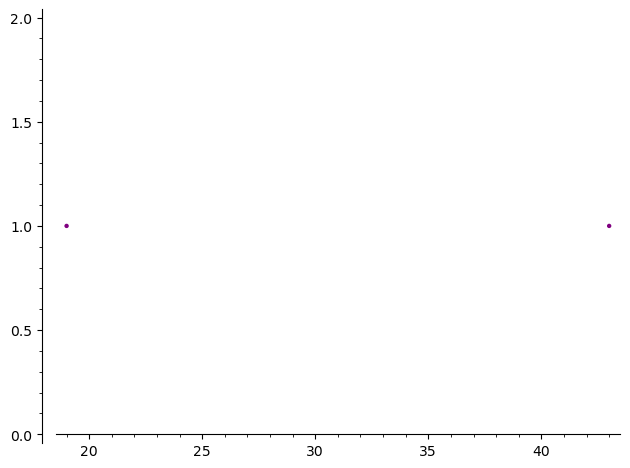

Distribution of the diameter of the Spine for p congruent to 3 mod 8:


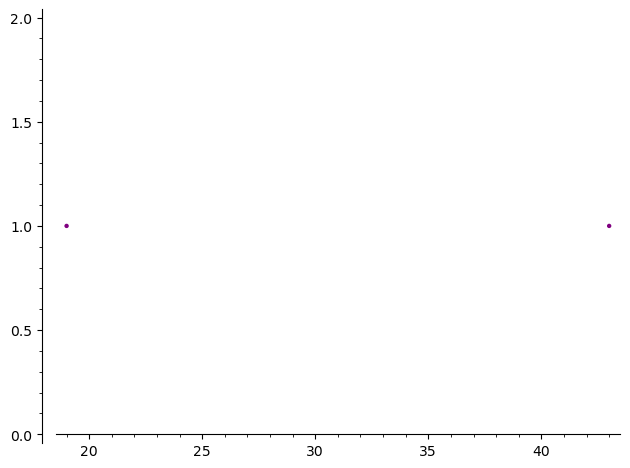

Distribution of the Mean of diameters of the components where p congruent to 1 mod 4 is red, p congruent to 7 mod 8 is green, p congruent to 3 mod 8 is purple:


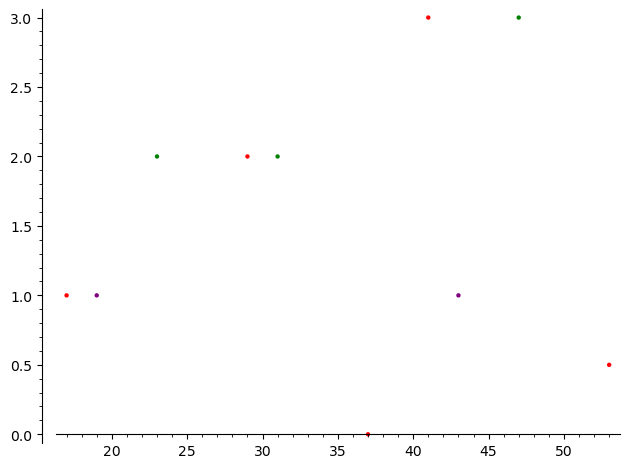

Distribution of the Median of diameters of the components where p congruent to 1 mod 4 is red, p congruent to 7 mod 8 is green, p congruent to 3 mod 8 is purple:


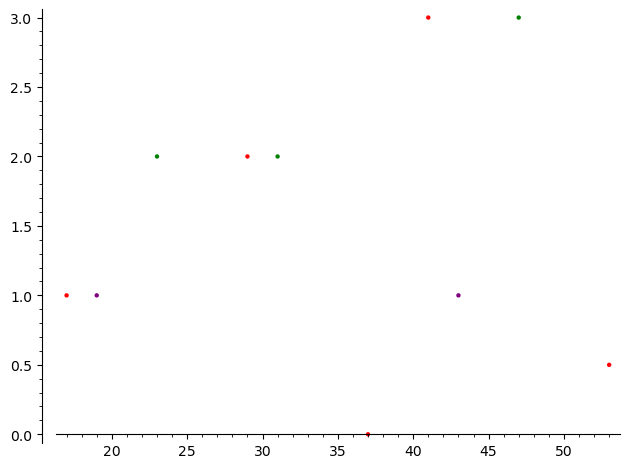

Distribution of the Mode of diameters of the components where p congruent to 1 mod 4 is red, p congruent to 7 mod 8 is green, p congruent to 3 mod 8 is purple:


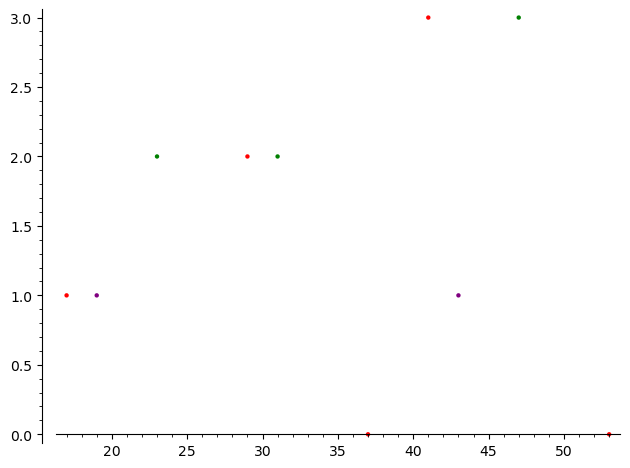

Distribution of the diameter of the Spine where p congruent to 1 mod 4 is red, p congruent to 7 mod 8 is green, p congruent to 3 mod 8 is purple:


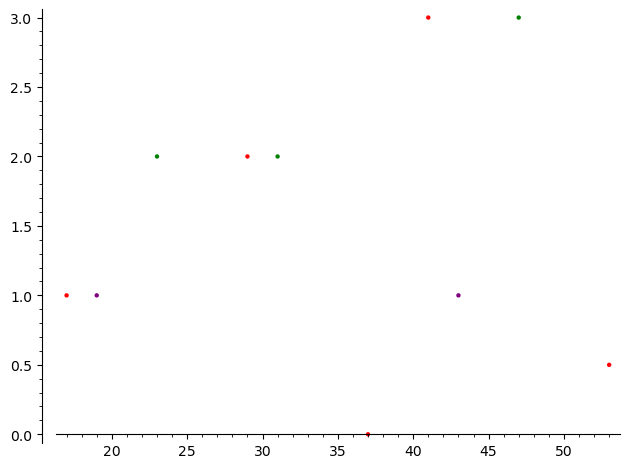

In [6]:
# Now we actually use all the functions
seq = int(input("For how many primes p>13 would you like to compute data? "))
ell = 2
counter = 0
allData = []
allData.append(("prime", "compDiamData", "fullDiamData"))
# allData2.append(("prime", "compGirthData", "fullGirthData"))
p = next_prime(13)
while counter<seq:
    graphs = directedSpineGraph(p,ell)
    fullIsogGraph = graphs[1]
    spine = graphs[0]
    compDiamData = compDiameterDistribution(spine)
    fullDiamData = fullDiameterNumber(spine)
    allData.append((p, compDiamData, fullDiamData))
    counter += 1
    p = next_prime(p)
    if counter == seq:
        break
import csv
def puttingDataIntoCsvFile(data):
    myList = data
    myNewList = []
    for i in range(len(myList)):
        if type(myList[i]) == type([]) or type(myList[i]) == type(()):
            myNewNewList = []
            for j in range(len(myList[i])):
                myNewNewList.append(str(myList[i][j]))
            myNewList.append((myNewNewList))
        else:
            myNewList.append(str(myList[i]))
    with open('diameter_data.csv', 'w') as file:
        writer = csv.writer(file)
        writer.writerows(myNewList)
puttingDataIntoCsvFile(allData)


# FULL DATA:

# Graphs:

# compDiam Graphs:
print("Distribution of the Mean of diameters of the components:")
R = sage.plot.point.point2d([allData[n][0], allData[n][1][1]] for n in range(1, seq+1))
R.show()
print("Distribution of the Median of diameters of the components:")
S = sage.plot.point.point2d([allData[n][0], allData[n][1][2]] for n in range(1, seq+1))
S.show()
print("Distribution of the Mode of diameters of the components:")
T = sage.plot.point.point2d([allData[n][0], allData[n][1][3]] for n in range(1, seq+1))
T.show()
# fullDiam Graph:
print("Distribution of the diameter of the Spine:")
U = sage.plot.point.point2d([allData[n][0], allData[n][2]] for n in range(1, seq+1))
U.show()

# P CONGRUENT TO 1 MOD 4:

print("Distribution of the Mean of diameters of the components for p congruent to 1 mod 4:")
oR = sage.plot.point.point2d([[allData[n][0], allData[n][1][1]] for n in range(1, seq+1) if allData[n][0] % 4 == 1], rgbcolor = 'red')
oR.show()
print("Distribution of the Median of diameters of the components for p congruent to 1 mod 4:")
oS = sage.plot.point.point2d([[allData[n][0], allData[n][1][2]] for n in range(1, seq+1) if allData[n][0] % 4 == 1], rgbcolor = 'red')
oS.show()
print("Distribution of the Mode of diameters of the components for p congruent to 1 mod 4:")
oT = sage.plot.point.point2d([[allData[n][0], allData[n][1][3]] for n in range(1, seq+1) if allData[n][0] % 4 == 1], rgbcolor = 'red')
oT.show()
# fullDiam Graph:
print("Distribution of the diameter of the Spine for p congruent to 1 mod 4:")
oU = sage.plot.point.point2d([[allData[n][0], allData[n][2]] for n in range(1, seq+1) if allData[n][0] % 4 == 1], rgbcolor = 'red')
oU.show()

# P CONGRUENT TO 7 MOD 8:

print("Distribution of the Mean of diameters of the components for p congruent to 7 mod 8:")
sR = sage.plot.point.point2d([[allData[n][0], allData[n][1][1]] for n in range(1, seq+1) if allData[n][0] % 8 == 7], rgbcolor = 'green')
sR.show()
print("Distribution of the Median of diameters of the components for p congruent to 7 mod 8:")
sS = sage.plot.point.point2d([[allData[n][0], allData[n][1][2]] for n in range(1, seq+1) if allData[n][0] % 8 == 7], rgbcolor = 'green')
sS.show()
print("Distribution of the Mode of diameters of the components for p congruent to 7 mod 8:")
sT = sage.plot.point.point2d([[allData[n][0], allData[n][1][3]] for n in range(1, seq+1) if allData[n][0] % 8 == 7], rgbcolor = 'green')
sT.show()
# fullDiam Graph:
print("Distribution of the diameter of the Spine for p congruent to 7 mod 8:")
sU = sage.plot.point.point2d([[allData[n][0], allData[n][2]] for n in range(1, seq+1) if allData[n][0] % 8 == 7], rgbcolor = 'green')
sU.show()

# P CONGRUENT TO 3 MOD 8:

print("Distribution of the Mean of diameters of the components for p congruent to 3 mod 8:")
tR = sage.plot.point.point2d([[allData[n][0], allData[n][1][1]] for n in range(1, seq+1) if allData[n][0] % 8 == 3], rgbcolor = 'purple')
tR.show()
print("Distribution of the Median of diameters of the components for p congruent to 3 mod 8:")
tS = sage.plot.point.point2d([[allData[n][0], allData[n][1][2]] for n in range(1, seq+1) if allData[n][0] % 8 == 3], rgbcolor = 'purple')
tS.show()
print("Distribution of the Mode of diameters of the components for p congruent to 3 mod 8:")
tT = sage.plot.point.point2d([[allData[n][0], allData[n][1][3]] for n in range(1, seq+1) if allData[n][0] % 8 == 3], rgbcolor = 'purple')
tT.show()
# fullDiam Graph:
print("Distribution of the diameter of the Spine for p congruent to 3 mod 8:")
tU = sage.plot.point.point2d([[allData[n][0], allData[n][2]] for n in range(1, seq+1) if allData[n][0] % 8 == 3], rgbcolor = 'purple')
tU.show()

# FULL DATA WITH DISTINCTION:

print("Distribution of the Mean of diameters of the components where p congruent to 1 mod 4 is red, p congruent to 7 mod 8 is green, p congruent to 3 mod 8 is purple:")
wR = oR + sR + tR
wR.show()
print("Distribution of the Median of diameters of the components where p congruent to 1 mod 4 is red, p congruent to 7 mod 8 is green, p congruent to 3 mod 8 is purple:")
wS = oS + sS + tS
wS.show()
print("Distribution of the Mode of diameters of the components where p congruent to 1 mod 4 is red, p congruent to 7 mod 8 is green, p congruent to 3 mod 8 is purple:")
wT = oT + sT + tT
wT.show()
# fullDiam Graph:
print("Distribution of the diameter of the Spine where p congruent to 1 mod 4 is red, p congruent to 7 mod 8 is green, p congruent to 3 mod 8 is purple:")
wU = oU + sU + tU
wU.show()
